In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('salary.csv')

# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This dataset contains 32561 rows and 15 columns, and our target variable is the `salary` column.

In [3]:
# Check the top 5 rows
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. Preprocessing

## Handling missing values and duplicated rows.

In [4]:
# Check the number of NaN values in every column
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

It seems that there are no missing values in this dataset. However, we can only conclude that there are no missing values __in the numerical columns__. Since sometimes missing values are marked with string characters (e.g. empty space ' '), we have to make sure there are no missing values in the __object__ columns.

In [5]:
# Select object columns
df_obj = df.select_dtypes('object')
df_obj

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [6]:
# Check the unique values in each column
for col in df_obj:
    print(f'Column: {col}','\n')
    print(df_obj[col].value_counts(),'\n')

Column: workclass 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

Column: education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

Column: marital-status 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 


From the above results, there are missing values in `workclass`, `occupation`, and `native-country`, marked as the question mark symbol '?'.

In [7]:
# Replace the question marks with `NaN`
df.replace('\?',np.nan,regex=True,inplace=True)

# Check the number of missing values in each column
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [8]:
# Check how many nan rows there are in total
df_nan = df[df.isna().any(axis=1)]

df_nan

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [9]:
# Write this as a percentage of the total rows
print(f'Number of missing values = {round(df_nan.shape[0]/df.shape[0]*100,2)}')

Number of missing values = 7.37


So the number of missing values are still less than 10 percent of the whole data. We can safely drop these rows altogether.

In [10]:
# Drop the missing values
df.dropna(inplace=True)

In [11]:
# Check again
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

We have got rid of the missing values.

In [12]:
# Check the number of duplicated rows
df[df.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [13]:
print(df[df.duplicated(keep=False)].shape[0])

45


So we have 45 duplicated rows. We are only going to pick the first row from this set of duplicated rows.

In [14]:
# Keep the first row and drop the duplicated ones
df.drop_duplicates(inplace=True)

In [15]:
# Check again
df.duplicated().sum()

0

We have checked and handled the missing values and duplicated rows in our dataset. Before we proceed to splitting the data into training and test set, we can perform encoding on the target column beforehand, since this will not result in any information leakage.

Since there are only two values in `salary`, we can use binary encoding.

In [16]:
df['salary'] = df['salary'].apply(lambda x: 0 if x ==' <=50K' else 1)

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


We have cleaned the data. Now we will split the data into training and test sets.

# 2. Train-Validation-Test Split

For this project, I split the dataset into training and test sets with 80:20 ratio.

In [17]:
from sklearn.model_selection import train_test_split

# Select the features
X = df.drop('salary',axis=1)
# Select the target
y = df[['salary']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 3. EDA and Feature Selection

Here we are going to explore the training data.

In [18]:
# Create a new dataframe containing the full training set (features + target)
df_train = X_train.join(y_train)

Before we proceed with data visualization, let us have a look at the distribution of the target variable.

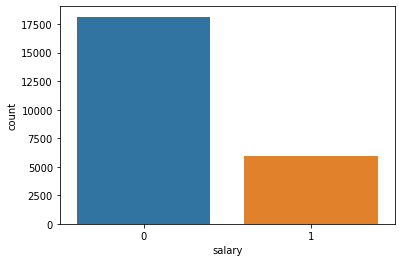

In [19]:
# Countplot for salary
sns.countplot(x=y_train['salary'])

In [20]:
# Summary statistics for salary
target = pd.DataFrame()
target['salary'] = y_train['salary'].unique()
target['count'] = y_train['salary'].value_counts()
target['percentage'] = target['count']/len(y_train)*100
target

,salary,count,percentage
0,0,18148,75.26855
1,1,5963,24.73145


Since the number of rows where `salary=1` is about one-third of those where `salary=0`, it is clear that we are dealing with an imbalanced dataset. To make our data understanding more objective, we are going to balance this by undersampling the rows where `salary=0`, since ~12000 rows are plenty enough for further analysis.

In [21]:
# Sample the rows where salary=0 by the number of rows where salary=1
count_1 = len(df_train[df_train['salary']==1])
df_salary_0 = df_train[df_train['salary']==0].sample(n=count_1)
df_salary_1 = df_train[df_train['salary']==1]

# Concatenate the two dataframes
df_train = pd.concat([df_salary_0,df_salary_1]).reset_index(drop=True)

# Redefine X_train and y_train
y_train = df_train[['salary']]
X_train = df_train.drop('salary',axis=1)

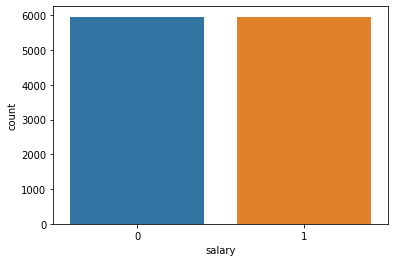

In [22]:
# Check the results
sns.countplot(x=df_train['salary'])

We have balanced our training data.

## Univariate Analysis

Next, for convenience, we split the data based on their types: numerical and categorical.

In [23]:
# Numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = df_train.select_dtypes(include=numerics).columns.tolist()

# Categorical columns (everything else)
cat_col = [col_names for col_names in df_train.columns.tolist() if col_names not in num_col]

In [24]:
# Summary statistics for the numerical data
df_train[num_col].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,11926.000000,1.192600e+04,11926.000000,11926.000000,11926.000000,11926.000000,11926.000000
mean,40.318883,1.892994e+05,10.620996,1977.439376,124.281654,42.483398,0.500000
std,12.510659,1.038952e+05,2.602062,10104.173906,479.121639,11.754313,0.500021
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,1.182715e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,40.000000,1.775265e+05,10.000000,0.000000,0.000000,40.000000,0.500000
75%,49.000000,2.365828e+05,13.000000,0.000000,0.000000,50.000000,1.000000
max,90.000000,1.268339e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Some observations:
1. Since the target (`salary`) is binary, we do not need to consider its symmetricity.
2. The columns `age`, `fnlwgt`, `education-num`, and `hours-per-week` have mean values roughly equal to their median values, which might be an indication that their distribution are symmetric. Also, these columns do not exhibit any outliers.
3. The columns `education-num` and `hours-per-week` seem to have discrete values.
4. The columns `capital-gain` and `capital-loss` have a lot of zero values, indicated by their median values. For `capital-gain`, its maximum value seems to be an outlier.

In [25]:
# Summary statistics for the categorical data
df_train[cat_col].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,11926,11926,11926,11926,11926,11926,11926,11926
unique,7,16,7,14,6,5,2,40
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
freq,8452,3406,7075,2066,6270,10379,8693,10945


Some observations:
1. Most people in this dataset work in private sectors.
2. Their last education are mostly high school graduates.
3. This data consist mainly of people from the United States.

Let's visualize the numerical columns and perform univariate and multivariate analysis

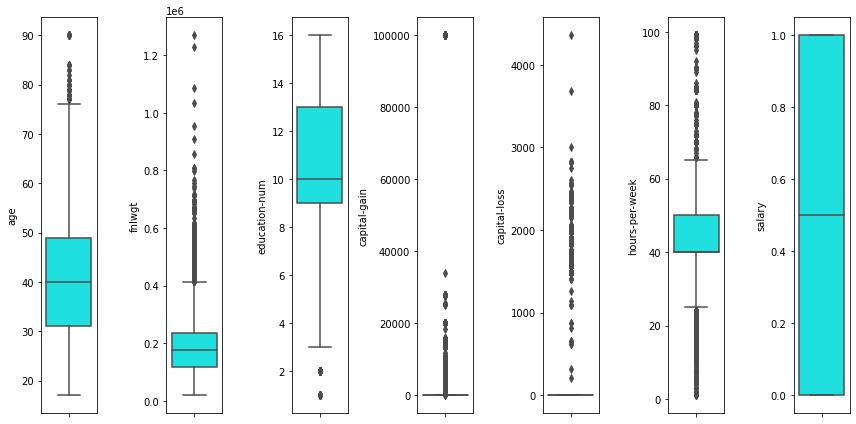

In [26]:
# Set figure size
plt.figure(figsize=(12,6))

# Boxplot for each numerical column
for i in range(0, len(num_col)):
    plt.subplot(1, len(num_col), i+1)
    sns.boxplot(y=df_train[num_col[i]], color='cyan')
    plt.tight_layout()

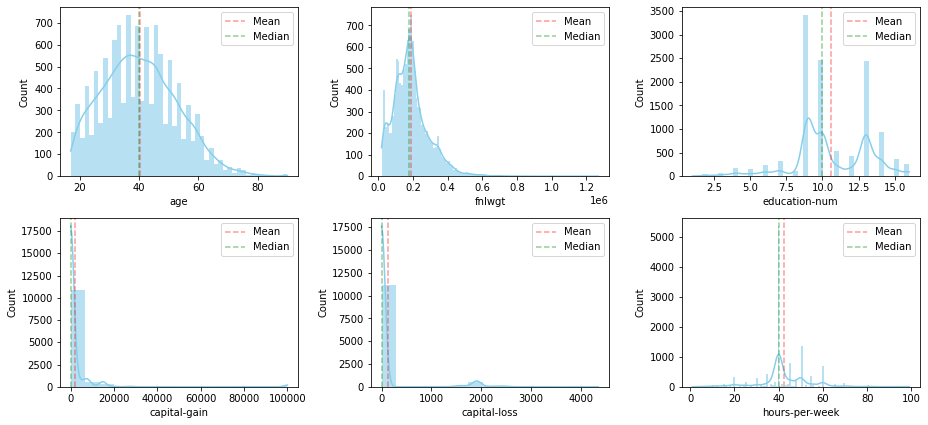

In [27]:
# Make histograms and kde plot to see the actual distribution
fig, axes = plt.subplots(2,len(num_col)//2,figsize=(13,6))

for i, ax in enumerate(fig.axes):
    sns.histplot(df_train[num_col[i]],ax=ax,kde=True,alpha=0.6,color='skyblue',edgecolor=None)
    
    # Plot the mean and median values as vertical lines
    ax.axvline(x=df_train[num_col[i]].mean(),ls='--',color='red',alpha=0.4,label='Mean')
    ax.axvline(x=df_train[num_col[i]].median(),ls='--',color='green',alpha=0.4,label='Median')
    ax.legend()

plt.tight_layout()

Some observations:

1. `age` has a symmetrical distribution with a cut at its minimum value (i.e. a censored Gaussian distribution).
2. `fnlwgt` also has a roughly symmetrical distribution, however there are some outliers with very high values.
3. `education-num` contains very few discrete values, so it is better to visualize it using barplot.
4. `capital-gain` and `capital-loss` have a lot of zeros, so they seem to hold no predictive power for `salary`.

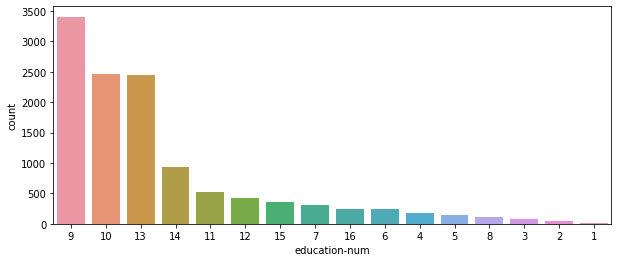

In [28]:
# Bar plot for education-num and hours-per-week
plt.figure(figsize=(10,4))
ed_num_count = df_train.groupby(['education-num']).agg(count=('education-num','count')).reset_index()
sns.barplot(x='education-num',y='count',data=ed_num_count,order=ed_num_count.sort_values(by='count',ascending=False)['education-num'])

Therefore most people have `education-num` equal to 9.

Let's see the distribution of the categorical features using countplot.

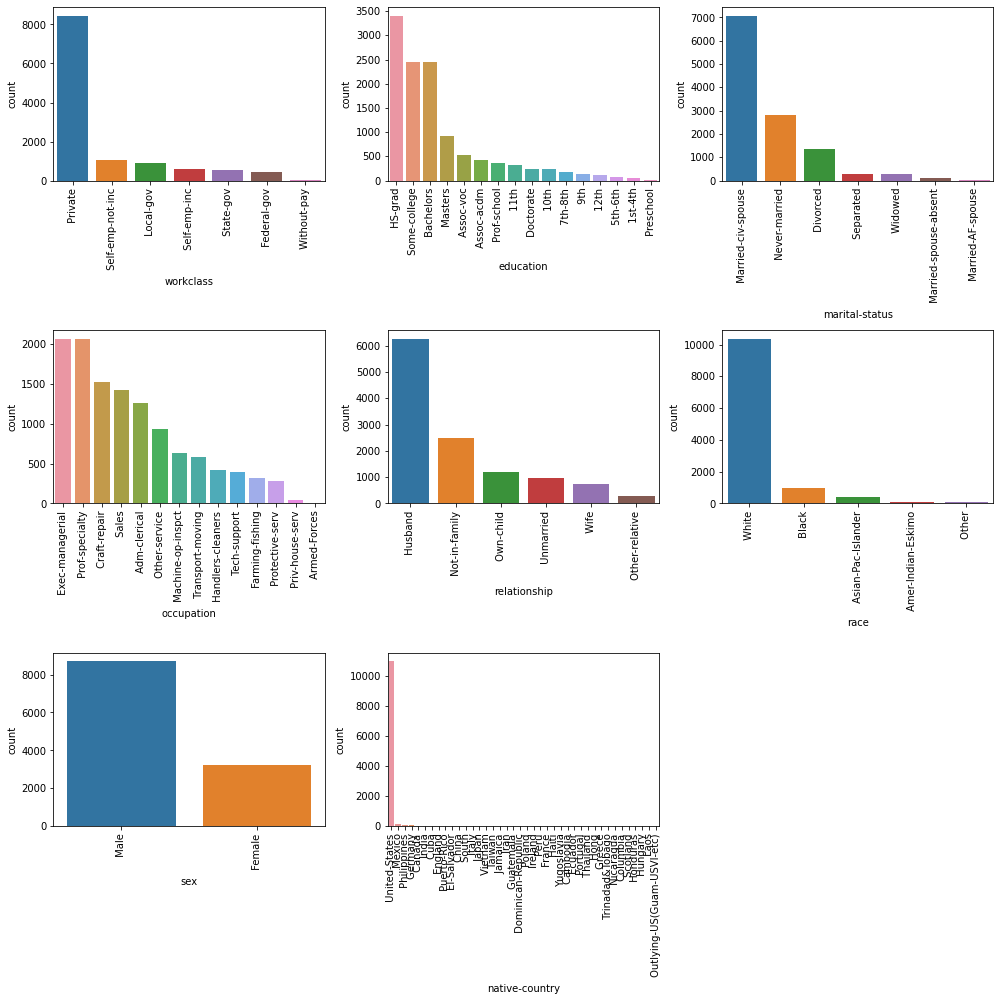

In [29]:
# Make histograms and kde plot to see the actual distribution
plt.figure(figsize=(14,14))

for i,col in enumerate(cat_col):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df_train[col],order=df_train[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.tight_layout()

## Multivariate Analysis

Let us perform multivariate study for the categorical variable first.

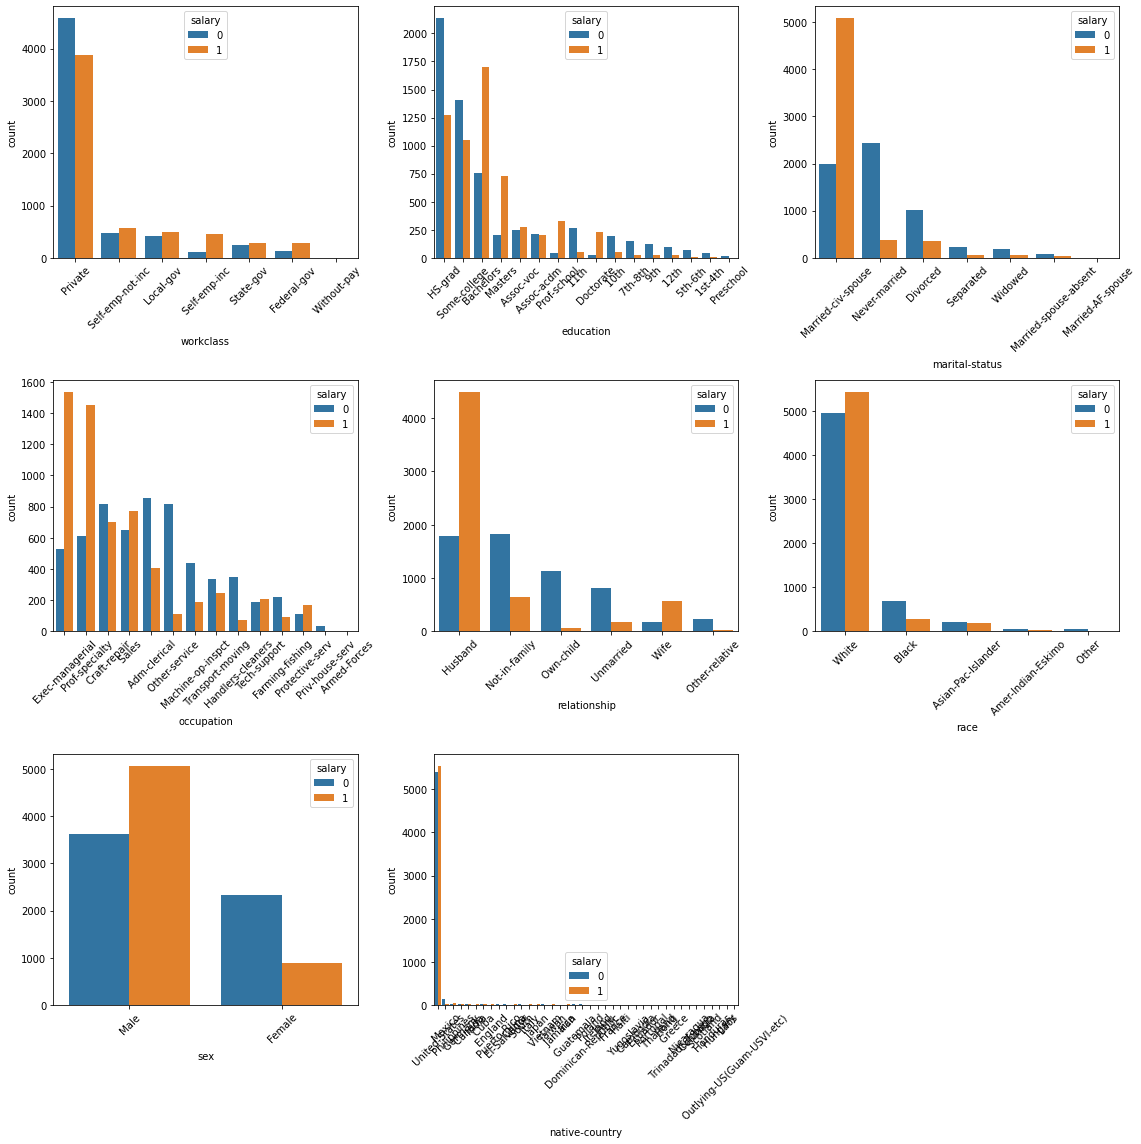

In [30]:
# Check the tendency of high salary for each categorical variable
fig, axes = plt.subplots(3,3,figsize=(16,16))
# axes[-1,-1].remove()

cat_col_new = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=cat_col_new[i],data=df_train,ax=ax,order=df_train[cat_col_new[i]].value_counts(ascending=False).index,hue='salary')
    ax.tick_params(axis='x', labelrotation = 45)
    
axes[-1,-1].remove()
plt.tight_layout()

To make these comparisons more meaningful, let us see the percentage of `salary` in each unique categorical value.

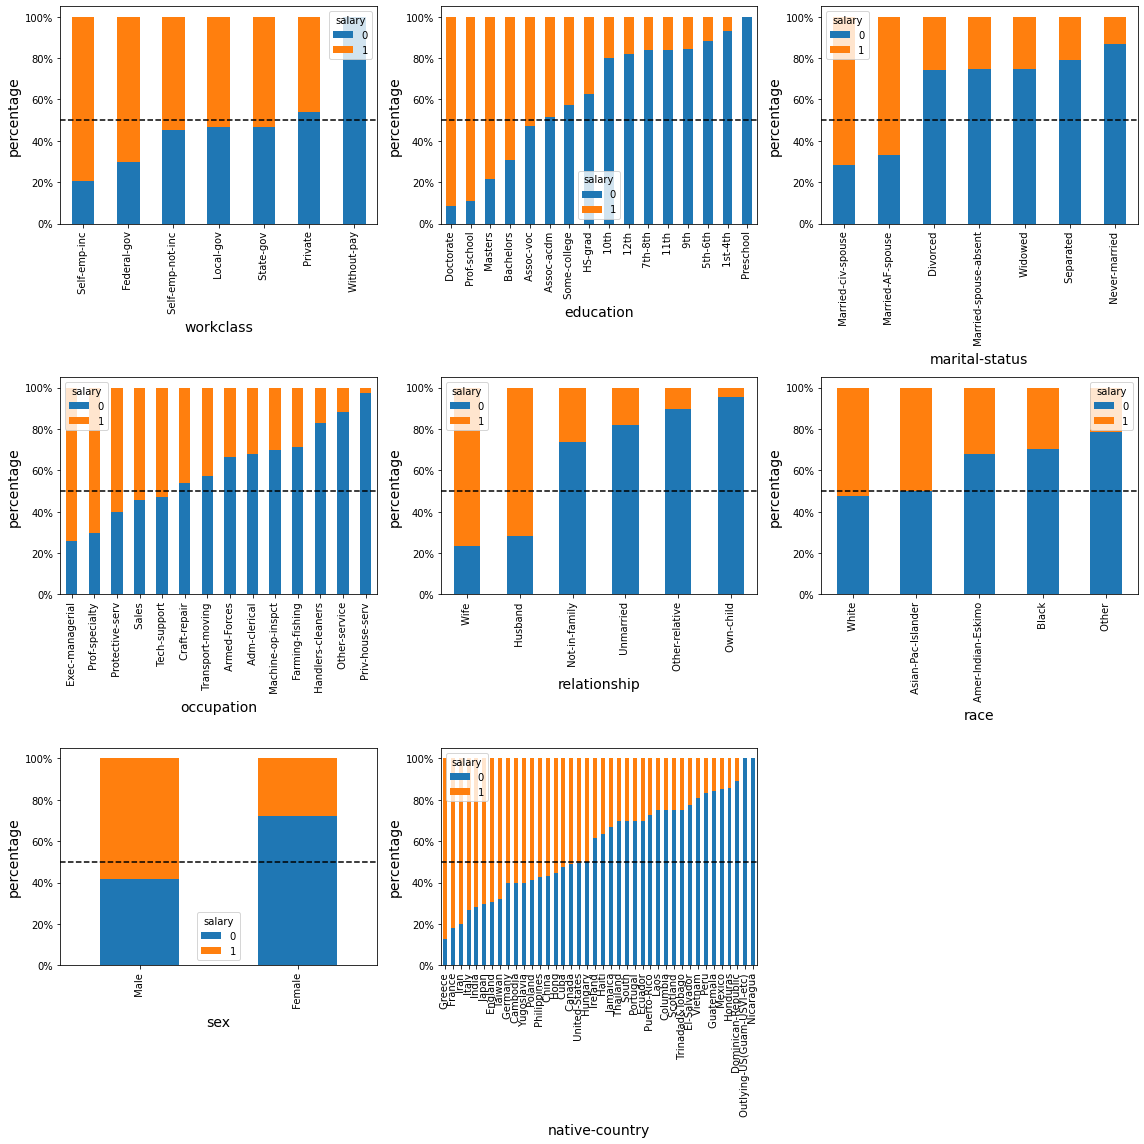

In [31]:
# Check the tendency of high salary for each categorical variable
import matplotlib.ticker as mtick 

fig, axes = plt.subplots(3,3,figsize=(16,16))

for i, col in enumerate(cat_col):
    ax = fig.axes[i]
    df_count = df_train.groupby([col,'salary']).size().unstack().T
    df_pct = df_count/df_count.sum()*100
    df_pct.T.sort_values(by=0).plot(kind='bar',stacked=True,ax=ax)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#     ax.legend(loc='center',prop={'size':14},title = 'salary',fontsize =14)
    ax.set_ylabel('percentage',size = 14)
    ax.xaxis.label.set_size(14)
    ax.axhline(y=50,ls='--',color='k')
    
axes[-1,-1].remove()
plt.tight_layout()

Some observations:

1. In `workclass`, self-employed people tend to have more salary.
2. In `education`, people with doctorate degrees tend to make more salary.
3. Men tend to make more salary than women.
4. Overall, all of the categorical features show correlation with `salary`.

Let us turn our attention to the numerical features. First, we make the pairplot for all features.

<Figure size 1152x720 with 0 Axes>

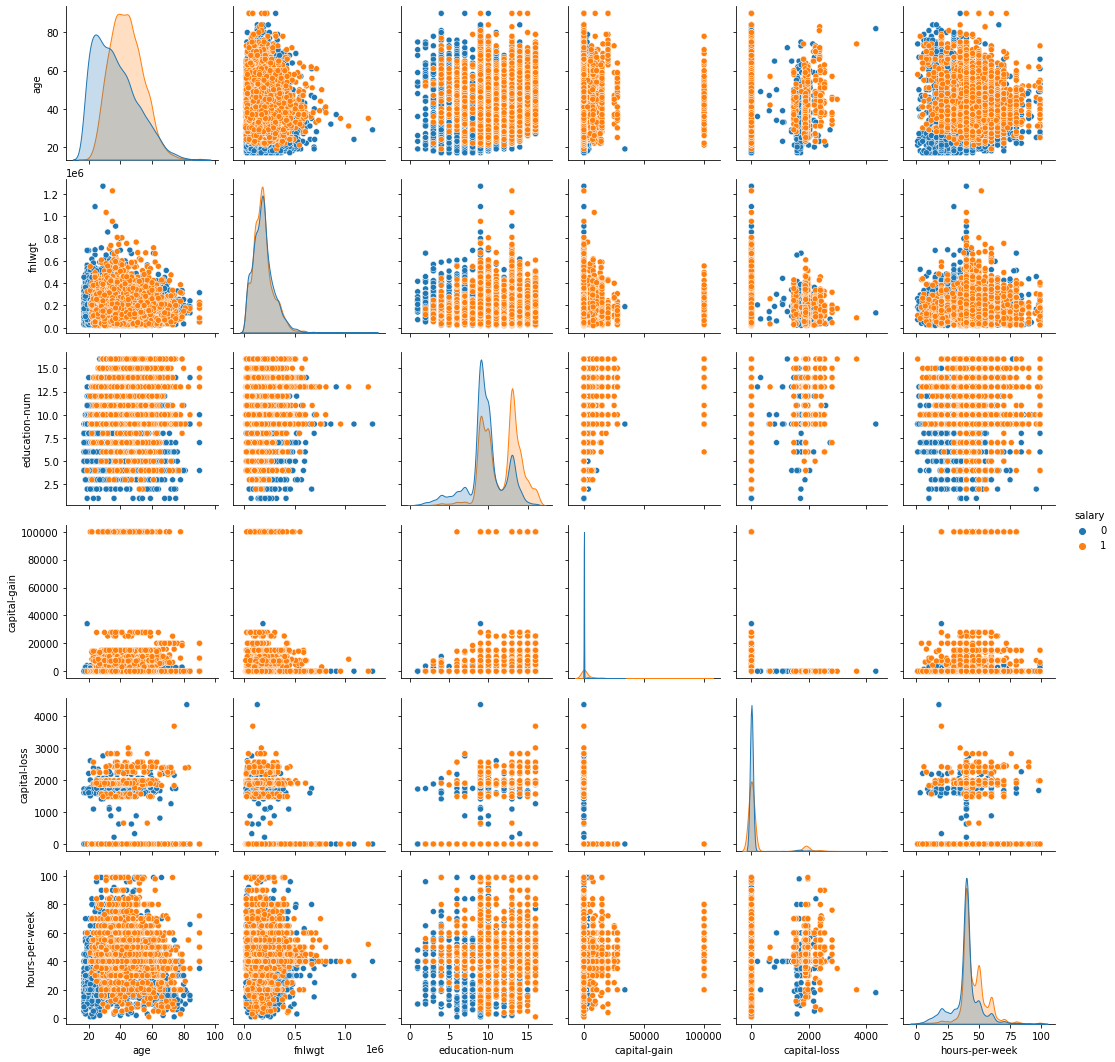

In [32]:
# Make pairplot
plt.figure(figsize=(16,10))
sns.pairplot(df_train[num_col],hue='salary')

It seems there is not a clear distinction in the numerical features based on `salary`. Also, there does not seem to be any multicollinearity between the features. However, people with high salary tend to be older, as can be seen from `age`, and they also tend to have higher `education-num`.

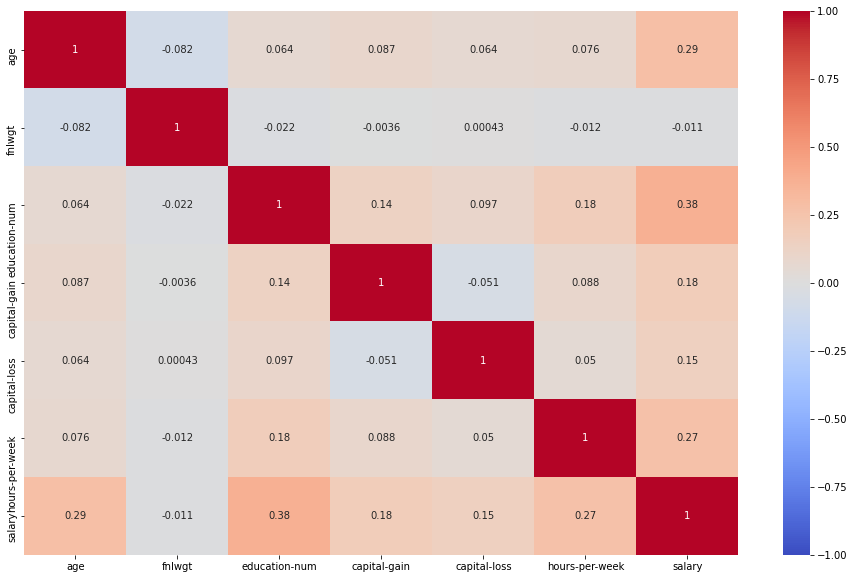

In [33]:
# Make correlation heatmap for the numerical columns
plt.figure(figsize=(16,10))
sns.heatmap(df_train[num_col].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

The heatmap above also shows that all the numerical features correlate very weakly with `salary`, and there does not seem to be any high correlation among the features.

I decided to not drop any feature since they are all weakly correlated to `salary` anyways.

In [105]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21,Private,154835,Some-college,10,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,40,Vietnam
1,32,Private,73498,7th-8th,4,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States
2,26,Private,166666,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States
3,62,Private,116104,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,Germany
4,52,Private,91048,HS-grad,9,Divorced,Machine-op-inspct,Own-child,Black,Female,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11921,46,State-gov,119904,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Female,0,1564,55,United-States
11922,38,Self-emp-not-inc,214008,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
11923,33,Private,144949,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States
11924,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States


# 4. Building the Model

I am going to use three classification algorithms: logistic regression, K-nearest neighbors, and random forest. I am also going to use the grid search method to perform hyperparameter tuning in order to find the best parameter combination for each algorithm.

In [35]:
# We first apply one hot encoding for all categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first',
                                                                    handle_unknown='ignore'),
                                                                    cat_col)]
                                            ,remainder='passthrough')

transformer.fit(X_train)
# Label encoding for training data
X_train_encoded = pd.DataFrame(transformer.transform(X_train).toarray(),columns=transformer.get_feature_names_out())
# Label encoding for test data
X_test_encoded = pd.DataFrame(transformer.transform(X_test).toarray(),columns=transformer.get_feature_names_out())

/home/mrafifrbbn/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Logistic Regression

In [96]:
# To check feature importance later, we use the same scale across all features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [97]:
# Import the logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# Import the grid search algorithm from sklearn
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# parameter grid to be tested for the logistic regression model
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-2,2,5),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=5)

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [98]:
# Print the best model and its accuracy from the cross-validation method
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8223210516974454


In [111]:
# Create an instance with the best parameters
logreg = LogisticRegression(C = 10.0, 
                            penalty = 'l1', 
                            solver = 'liblinear')

# Fit the model to the training data
logreg.fit(X_train_encoded,y_train)

# Check feature importance (the coefficient for each feature)
feature_importance=pd.DataFrame({'feature':list(X_train_encoded.columns),'feature_importance':[i for i in logreg.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False).head(10)

,feature,feature_importance
15,cat__education_ Doctorate,4.095144
19,cat__education_ Prof-school,3.594685
17,cat__education_ Masters,3.001881
21,cat__marital-status_ Married-AF-spouse,2.709991
14,cat__education_ Bachelors,2.562692
22,cat__marital-status_ Married-civ-spouse,2.292497
13,cat__education_ Assoc-voc,1.739922
44,cat__relationship_ Wife,1.705808
12,cat__education_ Assoc-acdm,1.658479
20,cat__education_ Some-college,1.397041


It looks like the most important features in this model are consistent with the results from EDA, i.e. most doctoral graduates tend to make >50k/year, followed by professors. Marital status: spouse is also very important in predicting `salary`, consistent with the EDA in previous sections.

In [101]:
# Make predictions for the test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

print(confusion_matrix(y_test,y_pred),'\n')
print(classification_report(y_test,y_pred))

[[4419   66]
 [1235  308]] 

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4485
           1       0.82      0.20      0.32      1543

    accuracy                           0.78      6028
   macro avg       0.80      0.59      0.60      6028
weighted avg       0.79      0.78      0.73      6028



In [94]:
print(f'accuracy = {accuracy_score(y_test,y_pred)}')
print(f'ROC AUC score = {roc_auc_score(y_test,y_pred)}')

accuracy = 0.8115461181154612
ROC AUC score = 0.8238288353704398


### K-nearest Neighbors

In [46]:
# For the KNN algorithm, we have to normalize the features first
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [47]:
# Import KNN from sklearn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameter = {'n_neighbors':range(1,30)}
clf = GridSearchCV(knn,
                   param_grid=parameter,
                   scoring='accuracy',
                   cv=5)

clf.fit(X_train_scaled,y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c03280>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c03280>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c030d0>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c030d0>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c03280>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c030d0>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c03280>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c03280>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c030d0>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c03280>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c030d0>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c030d0>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c03280>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c030d0>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe003c030d0>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [48]:
# Print the best model and its accuracy from the cross-validation method
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'n_neighbors': 29}
Accuracy : 0.7978367872688518


In [80]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train_scaled,np.ravel(y_train))

pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test,pred),'\n')
print(classification_report(y_test, pred))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fdfe5747430>
Traceback (most recent call last):
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mrafifrbbn/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[[3403 1082]
 [ 238 1305]] 

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      3641
           1       0.85      0.55      0.66      2387

    accuracy                           0.78      6028
   macro avg       0.80      0.74      0.75      6028
weighted avg       0.79      0.78      0.77      6028



In [81]:
print(f'accuracy = {accuracy_score(y_test,pred)}')
print(f'ROC AUC score = {roc_auc_score(y_test,pred)}')

accuracy = 0.781021897810219
ROC AUC score = 0.8022532081085435


### Random Forest

In [63]:
# Import random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
parameters = {'n_estimators':[100,200,300,400,500],
              'criterion': ['gini','entropy']}

clf = GridSearchCV(estimator=rf,
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=5)

clf.fit(X_train_encoded,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [64]:
# Print the best model and its accuracy from the cross-validation method
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'n_estimators': 300}
Accuracy : 0.8196376135423092


In [66]:
rf= RandomForestClassifier(n_estimators=300,
                           criterion = "entropy")

rf.fit(X_train_encoded, np.ravel(y_train))
y_predrf = rf.predict(X_test_encoded)

print(confusion_matrix(y_test,y_predrf),'\n')
print(classification_report(y_predrf, y_test))

[[3627  858]
 [ 236 1307]] 

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3863
           1       0.85      0.60      0.70      2165

    accuracy                           0.82      6028
   macro avg       0.83      0.77      0.79      6028
weighted avg       0.82      0.82      0.81      6028



In [72]:
print(f'accuracy = {accuracy_score(y_test,y_predrf)}')
print(f'ROC AUC score = {roc_auc_score(y_test,y_predrf)}')

accuracy = 0.818513603185136
ROC AUC score = 0.827873425568486


# 5. Conclusions

1. I have analyzed and performed a classification task on the 'Salary Prediction Classification' dataset obtained from Kaggle.
2. This dataset contains 15 columns, 6 of which are numerical, 8 are categorical, and the target feature `salary` is binary, where `salary` > 50k/year is labeled as 1 and `salary` <= 50k/year is labeled as 0.
3. I find that this dataset is biased towards `salary = 0`, and so I performed undersampling for that class to balance the data.
4. Based on the EDA, I find that the numerical features are very weakly correlated with `salary`, and the categorical features seem to have stronger correlations with `salary`.
5. Using all of the available features, I used three classification algorithms: logistic regression, K-nearest neighbors, and random forest to predict `salary`.
6. I also employed grid search algorithm to tune some of the parameters of each algorithm.
7. From the logistic regression model, the most important features are consistent with the observations from EDA.
8. The best model is the random forest classifier, where I can obtain an accuracy of 81.8%, or an ROC AUC score of 82.8% on the test data.